<a href="https://colab.research.google.com/github/SAPUII/Project/blob/main/LSTM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data

In [173]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##หุ้น PTT

In [174]:
ptt = pd.read_csv('/content/drive/MyDrive/Project1/PTT Historical Data.csv')
ptt.shape

(526, 7)

In [175]:
ptt.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,1/11/2021,38.00,38.0,38.50,37.50,54.15M,0.00%
1,2/11/2021,38.00,38.0,38.25,37.75,38.17M,0.00%
2,3/11/2021,37.75,38.0,38.25,37.50,26.75M,-0.66%
3,4/11/2021,37.50,37.5,37.75,37.00,57.08M,-0.66%
4,5/11/2021,37.25,37.5,37.75,37.25,34.20M,-0.67%


In [176]:
ptt.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [177]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
ptt=ptt[['วันเดือนปี','ล่าสุด','ปริมาณ']]
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(str)

# #แทนที่ M ด้วยช่องว่าง
# ptt['ปริมาณ'] = ptt['ปริมาณ'].str.replace('M', '', regex=True)
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(float)

# # สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
# def multiply_by_million(value):
#     return value * 1000000

# # ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
# ptt['ปริมาณ']=ptt['ปริมาณ'].apply(multiply_by_million)
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ptt =ptt.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ptt',
                        'ปริมาณ': 'vol_ptt'})
ptt



,date,cp_ptt,vol_ptt
0,1/11/2021,38.00,54.15M
1,2/11/2021,38.00,38.17M
2,3/11/2021,37.75,26.75M
3,4/11/2021,37.50,57.08M
4,5/11/2021,37.25,34.20M
...,...,...,...
521,22/12/2023,35.25,24.54M
522,25/12/2023,35.50,19.20M
523,26/12/2023,35.75,28.88M
524,27/12/2023,35.75,51.89M


In [178]:
ptt['vol_ptt']=ptt['vol_ptt'].astype(str)

# #แทนที่ M ด้วยช่องว่าง
ptt['vol_ptt'] = ptt['vol_ptt'].str.replace('M', '', regex=True)
ptt['vol_ptt']=ptt['vol_ptt'].astype(float)

# # สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
def multiply_by_million(value):
     return value * 1000000

# # ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
ptt['vol_ptt']=ptt['vol_ptt'].apply(multiply_by_million)
ptt['vol_ptt']=ptt['vol_ptt'].astype(int)
ptt

,date,cp_ptt,vol_ptt
0,1/11/2021,38.00,54150000
1,2/11/2021,38.00,38170000
2,3/11/2021,37.75,26750000
3,4/11/2021,37.50,57080000
4,5/11/2021,37.25,34200000
...,...,...,...
521,22/12/2023,35.25,24540000
522,25/12/2023,35.50,19200000
523,26/12/2023,35.75,28880000
524,27/12/2023,35.75,51890000


##หุ้น SCG

In [179]:
scg = pd.read_csv('/content/drive/MyDrive/Project1/SCG Historical Data.csv')
scg.shape


(526, 7)

In [180]:
scg.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,1/11/2021,6.75,6.70,6.95,6.20,2.60M,10.66%
1,2/11/2021,6.00,6.65,6.65,5.75,2.38M,-11.11%
2,3/11/2021,5.55,5.90,5.95,5.55,798.60K,-7.50%
3,4/11/2021,5.65,5.60,5.70,5.55,344.50K,1.80%
4,5/11/2021,5.70,5.75,5.75,5.60,376.50K,0.88%


In [181]:
scg.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [182]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
scg=scg[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
# scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
# scg['ปริมาณ']=scg['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
scg=scg.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_scg',
                        'ปริมาณ': 'vol_scg'})
scg

,date,cp_scg,vol_scg
0,1/11/2021,6.75,2.60M
1,2/11/2021,6.00,2.38M
2,3/11/2021,5.55,798.60K
3,4/11/2021,5.65,344.50K
4,5/11/2021,5.70,376.50K
...,...,...,...
521,22/12/2023,3.48,4.90K
522,25/12/2023,3.48,40.50K
523,26/12/2023,3.50,6.40K
524,27/12/2023,3.48,7.90K


In [183]:
scg['vol_scg'] = scg['vol_scg'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
scg['vol_scg']=scg['vol_scg'].astype(int)
scg

,date,cp_scg,vol_scg
0,1/11/2021,6.75,2600000
1,2/11/2021,6.00,2380000
2,3/11/2021,5.55,798600
3,4/11/2021,5.65,344500
4,5/11/2021,5.70,376500
...,...,...,...
521,22/12/2023,3.48,4900
522,25/12/2023,3.48,40500
523,26/12/2023,3.50,6400
524,27/12/2023,3.48,7900


##หุ้น SOLAR

In [184]:
solar = pd.read_csv('/content/drive/MyDrive/Project1/SOLAR Historical Data.csv')
solar.shape


(526, 7)

In [185]:
solar.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,1/11/2021,1.81,1.87,1.87,1.81,3.37M,-3.21%
1,2/11/2021,1.76,1.81,1.82,1.72,5.91M,-2.76%
2,3/11/2021,1.74,1.76,1.80,1.74,2.75M,-1.14%
3,4/11/2021,1.84,1.74,1.84,1.74,2.84M,5.75%
4,5/11/2021,1.82,1.86,1.86,1.80,1.59M,-1.09%


In [186]:
solar.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [187]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
solar=solar[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
# solar['ปริมาณ'] = solar['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
# solar['ปริมาณ']=solar['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
solar=solar.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_solar',
                        'ปริมาณ': 'vol_solar'})
solar

,date,cp_solar,vol_solar
0,1/11/2021,1.81,3.37M
1,2/11/2021,1.76,5.91M
2,3/11/2021,1.74,2.75M
3,4/11/2021,1.84,2.84M
4,5/11/2021,1.82,1.59M
...,...,...,...
521,22/12/2023,0.68,2.48M
522,25/12/2023,0.69,442.80K
523,26/12/2023,0.68,1.47M
524,27/12/2023,0.68,877.40K


In [188]:
# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
solar['vol_solar'] = solar['vol_solar'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
solar['vol_solar']=solar['vol_solar'].astype(int)
solar

,date,cp_solar,vol_solar
0,1/11/2021,1.81,3370000
1,2/11/2021,1.76,5910000
2,3/11/2021,1.74,2750000
3,4/11/2021,1.84,2840000
4,5/11/2021,1.82,1590000
...,...,...,...
521,22/12/2023,0.68,2480000
522,25/12/2023,0.69,442800
523,26/12/2023,0.68,1470000
524,27/12/2023,0.68,877400


## ราคาน้ำมันดิบ (WTI)

In [189]:
wti = pd.read_csv('/content/drive/MyDrive/Project1/WTI_USD Historical Data.csv')
wti.shape

(670, 7)

In [190]:
wti.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,1/11/2021,84.23,83.36,85.25,83.17,NaN,1.07%
1,2/11/2021,83.28,84.22,84.77,82.89,NaN,-1.13%
2,3/11/2021,80.66,83.26,83.31,80.02,NaN,-3.15%
3,4/11/2021,80.05,80.67,83.70,78.57,NaN,-0.76%
4,5/11/2021,81.44,80.05,82.07,79.25,NaN,1.74%


In [191]:
wti.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [192]:
wti.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [193]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
wti=wti[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
wti =wti .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_wti'})
wti

,date,cp_wti
0,1/11/2021,84.23
1,2/11/2021,83.28
2,3/11/2021,80.66
3,4/11/2021,80.05
4,5/11/2021,81.44
...,...,...
665,25/12/2023,73.66
666,26/12/2023,75.12
667,27/12/2023,73.92
668,28/12/2023,71.92


##ราคาทองคำ (XAU)

In [194]:
xau = pd.read_csv('/content/drive/MyDrive/Project1/XAU_USD Historical Data.csv')
xau.shape

(564, 7)

In [195]:
xau.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,1/11/2021,"1,793.05","1,783.24","1,796.20","1,778.89",NaN,0.57%
1,2/11/2021,"1,787.28","1,793.61","1,796.91","1,785.78",NaN,-0.32%
2,3/11/2021,"1,769.52","1,787.71","1,788.42","1,758.45",NaN,-0.99%
3,4/11/2021,"1,791.70","1,769.98","1,799.26","1,769.13",NaN,1.25%
4,5/11/2021,"1,816.73","1,792.14","1,818.61","1,785.17",NaN,1.40%


In [196]:
xau.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [197]:
xau.dtypes

วันเดือนปี     object
ล่าสุด         object
ราคาเปิด       object
สูงสุด         object
ต่ำสุด         object
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [198]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
xau=xau[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
xau =xau .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_xau'})
xau['cp_xau'] = xau['cp_xau'].str.replace(',', '').astype(float)
xau

,date,cp_xau
0,1/11/2021,1793.05
1,2/11/2021,1787.28
2,3/11/2021,1769.52
3,4/11/2021,1791.70
4,5/11/2021,1816.73
...,...,...
559,25/12/2023,2054.93
560,26/12/2023,2067.20
561,27/12/2023,2077.00
562,28/12/2023,2066.04


##อัตราแลกเปลี่ยน (EX)

In [199]:
ex = pd.read_csv('/content/drive/MyDrive/Project1/USD_THB Historical Data.csv')
ex.shape

(565, 7)

In [200]:
ex.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,1/11/2021,33.29,33.310,33.490,33.270,NaN,0.00%
1,2/11/2021,33.26,33.295,33.345,33.220,NaN,-0.09%
2,3/11/2021,33.30,33.265,33.460,33.255,NaN,0.12%
3,4/11/2021,33.34,33.300,33.470,33.260,NaN,0.12%
4,5/11/2021,33.20,33.360,33.395,33.140,NaN,-0.42%


In [201]:
ex.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [202]:
ex.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [203]:
ex =ex .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ex'})
ex = ex[['date' ,'cp_ex']]
ex

,date,cp_ex
0,1/11/2021,33.29
1,2/11/2021,33.26
2,3/11/2021,33.30
3,4/11/2021,33.34
4,5/11/2021,33.20
...,...,...
560,25/12/2023,34.60
561,26/12/2023,34.55
562,27/12/2023,34.33
563,28/12/2023,34.26


##Date

In [204]:
date = pd.read_csv('/content/drive/MyDrive/Project1/date.csv')
date

,Date,day,month,year,date
0,1/11/2021,1,11,2021,1/11/2021
1,2/11/2021,2,11,2021,2/11/2021
2,3/11/2021,3,11,2021,3/11/2021
3,4/11/2021,4,11,2021,4/11/2021
4,5/11/2021,5,11,2021,5/11/2021
...,...,...,...,...,...
560,25/12/2023,25,12,2023,25/12/2023
561,26/12/2023,26,12,2023,26/12/2023
562,27/12/2023,27,12,2023,27/12/2023
563,28/12/2023,28,12,2023,28/12/2023


In [205]:
date = date[['date']]
date

,date
0,1/11/2021
1,2/11/2021
2,3/11/2021
3,4/11/2021
4,5/11/2021
...,...
560,25/12/2023
561,26/12/2023
562,27/12/2023
563,28/12/2023


##Merge Table

In [206]:
tm1 = date.merge(ptt, how ='left', left_on=['date',], right_on=['date',])
tm2 = tm1.merge(scg, how ='left', left_on=['date',], right_on=['date',])
tm3 = tm2.merge(solar, how ='left', left_on=['date',], right_on=['date',])
tm4 = tm3.merge(xau, how ='left', left_on=['date',], right_on=['date',])
tm5 = tm4.merge(ex, how ='left', left_on=['date',], right_on=['date',])
tm7 = tm5.merge(wti, how ='left', left_on=['date',], right_on=['date',])
all_data = tm7

In [207]:
all_data

,date,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar,cp_xau,cp_ex,cp_wti
0,1/11/2021,38.00,54150000.0,6.75,2600000.0,1.81,3370000.0,1793.05,33.29,84.23
1,2/11/2021,38.00,38170000.0,6.00,2380000.0,1.76,5910000.0,1787.28,33.26,83.28
2,3/11/2021,37.75,26750000.0,5.55,798600.0,1.74,2750000.0,1769.52,33.30,80.66
3,4/11/2021,37.50,57080000.0,5.65,344500.0,1.84,2840000.0,1791.70,33.34,80.05
4,5/11/2021,37.25,34200000.0,5.70,376500.0,1.82,1590000.0,1816.73,33.20,81.44
...,...,...,...,...,...,...,...,...,...,...
560,25/12/2023,35.50,19200000.0,3.48,40500.0,0.69,442800.0,2054.93,34.60,73.66
561,26/12/2023,35.75,28880000.0,3.50,6400.0,0.68,1470000.0,2067.20,34.55,75.12
562,27/12/2023,35.75,51890000.0,3.48,7900.0,0.68,877400.0,2077.00,34.33,73.92
563,28/12/2023,35.75,55170000.0,3.48,4000.0,0.67,570200.0,2066.04,34.26,71.92


In [208]:
all_data.isnull().any()

date         False
cp_ptt        True
vol_ptt       True
cp_scg        True
vol_scg       True
cp_solar      True
vol_solar     True
cp_xau        True
cp_ex        False
cp_wti        True
dtype: bool

In [209]:
all_data['date'] = all_data['date'].str.replace('/', '-')
all_data

,date,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar,cp_xau,cp_ex,cp_wti
0,1-11-2021,38.00,54150000.0,6.75,2600000.0,1.81,3370000.0,1793.05,33.29,84.23
1,2-11-2021,38.00,38170000.0,6.00,2380000.0,1.76,5910000.0,1787.28,33.26,83.28
2,3-11-2021,37.75,26750000.0,5.55,798600.0,1.74,2750000.0,1769.52,33.30,80.66
3,4-11-2021,37.50,57080000.0,5.65,344500.0,1.84,2840000.0,1791.70,33.34,80.05
4,5-11-2021,37.25,34200000.0,5.70,376500.0,1.82,1590000.0,1816.73,33.20,81.44
...,...,...,...,...,...,...,...,...,...,...
560,25-12-2023,35.50,19200000.0,3.48,40500.0,0.69,442800.0,2054.93,34.60,73.66
561,26-12-2023,35.75,28880000.0,3.50,6400.0,0.68,1470000.0,2067.20,34.55,75.12
562,27-12-2023,35.75,51890000.0,3.48,7900.0,0.68,877400.0,2077.00,34.33,73.92
563,28-12-2023,35.75,55170000.0,3.48,4000.0,0.67,570200.0,2066.04,34.26,71.92


In [210]:
#all_data.to_csv('Project.csv', index=False)

##แทนค่าสูญหาย

In [211]:
all_data.isnull().any()

date         False
cp_ptt        True
vol_ptt       True
cp_scg        True
vol_scg       True
cp_solar      True
vol_solar     True
cp_xau        True
cp_ex        False
cp_wti        True
dtype: bool

In [212]:
all_data.columns

Index(['date', 'cp_ptt', 'vol_ptt', 'cp_scg', 'vol_scg', 'cp_solar',
       'vol_solar', 'cp_xau', 'cp_ex', 'cp_wti'],
      dtype='object')

In [213]:
# ใช้ fillna() เพื่อแทนค่าว่างด้วยค่าก่อนหน้า
all_data.fillna(method='ffill', inplace=True)
all_data

,date,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar,cp_xau,cp_ex,cp_wti
0,1-11-2021,38.00,54150000.0,6.75,2600000.0,1.81,3370000.0,1793.05,33.29,84.23
1,2-11-2021,38.00,38170000.0,6.00,2380000.0,1.76,5910000.0,1787.28,33.26,83.28
2,3-11-2021,37.75,26750000.0,5.55,798600.0,1.74,2750000.0,1769.52,33.30,80.66
3,4-11-2021,37.50,57080000.0,5.65,344500.0,1.84,2840000.0,1791.70,33.34,80.05
4,5-11-2021,37.25,34200000.0,5.70,376500.0,1.82,1590000.0,1816.73,33.20,81.44
...,...,...,...,...,...,...,...,...,...,...
560,25-12-2023,35.50,19200000.0,3.48,40500.0,0.69,442800.0,2054.93,34.60,73.66
561,26-12-2023,35.75,28880000.0,3.50,6400.0,0.68,1470000.0,2067.20,34.55,75.12
562,27-12-2023,35.75,51890000.0,3.48,7900.0,0.68,877400.0,2077.00,34.33,73.92
563,28-12-2023,35.75,55170000.0,3.48,4000.0,0.67,570200.0,2066.04,34.26,71.92


In [214]:
all_data.isnull().any()

date         False
cp_ptt       False
vol_ptt      False
cp_scg       False
vol_scg      False
cp_solar     False
vol_solar    False
cp_xau       False
cp_ex        False
cp_wti       False
dtype: bool

In [215]:
# คูณคอลัมน์ 'cp_wti' ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
all_data['cp_wti'] = all_data['cp_wti'] * all_data['cp_ex']
# คูณคอลัมน์ 'cp_xau ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
all_data['cp_xau'] = all_data['cp_xau'] * all_data['cp_ex']
all_data

,date,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar,cp_xau,cp_ex,cp_wti
0,1-11-2021,38.00,54150000.0,6.75,2600000.0,1.81,3370000.0,59690.6345,33.29,2804.0167
1,2-11-2021,38.00,38170000.0,6.00,2380000.0,1.76,5910000.0,59444.9328,33.26,2769.8928
2,3-11-2021,37.75,26750000.0,5.55,798600.0,1.74,2750000.0,58925.0160,33.30,2685.9780
3,4-11-2021,37.50,57080000.0,5.65,344500.0,1.84,2840000.0,59735.2780,33.34,2668.8670
4,5-11-2021,37.25,34200000.0,5.70,376500.0,1.82,1590000.0,60315.4360,33.20,2703.8080
...,...,...,...,...,...,...,...,...,...,...
560,25-12-2023,35.50,19200000.0,3.48,40500.0,0.69,442800.0,71100.5780,34.60,2548.6360
561,26-12-2023,35.75,28880000.0,3.50,6400.0,0.68,1470000.0,71421.7600,34.55,2595.3960
562,27-12-2023,35.75,51890000.0,3.48,7900.0,0.68,877400.0,71303.4100,34.33,2537.6736
563,28-12-2023,35.75,55170000.0,3.48,4000.0,0.67,570200.0,70782.5304,34.26,2463.9792


In [216]:
all_data = round(all_data, 2) #ทศนิยม 2 ตำแหน่ง
all_data

,date,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar,cp_xau,cp_ex,cp_wti
0,1-11-2021,38.00,54150000.0,6.75,2600000.0,1.81,3370000.0,59690.63,33.29,2804.02
1,2-11-2021,38.00,38170000.0,6.00,2380000.0,1.76,5910000.0,59444.93,33.26,2769.89
2,3-11-2021,37.75,26750000.0,5.55,798600.0,1.74,2750000.0,58925.02,33.30,2685.98
3,4-11-2021,37.50,57080000.0,5.65,344500.0,1.84,2840000.0,59735.28,33.34,2668.87
4,5-11-2021,37.25,34200000.0,5.70,376500.0,1.82,1590000.0,60315.44,33.20,2703.81
...,...,...,...,...,...,...,...,...,...,...
560,25-12-2023,35.50,19200000.0,3.48,40500.0,0.69,442800.0,71100.58,34.60,2548.64
561,26-12-2023,35.75,28880000.0,3.50,6400.0,0.68,1470000.0,71421.76,34.55,2595.40
562,27-12-2023,35.75,51890000.0,3.48,7900.0,0.68,877400.0,71303.41,34.33,2537.67
563,28-12-2023,35.75,55170000.0,3.48,4000.0,0.67,570200.0,70782.53,34.26,2463.98


In [217]:
# save data
#all_data.to_csv('Project_data.csv', index=False)

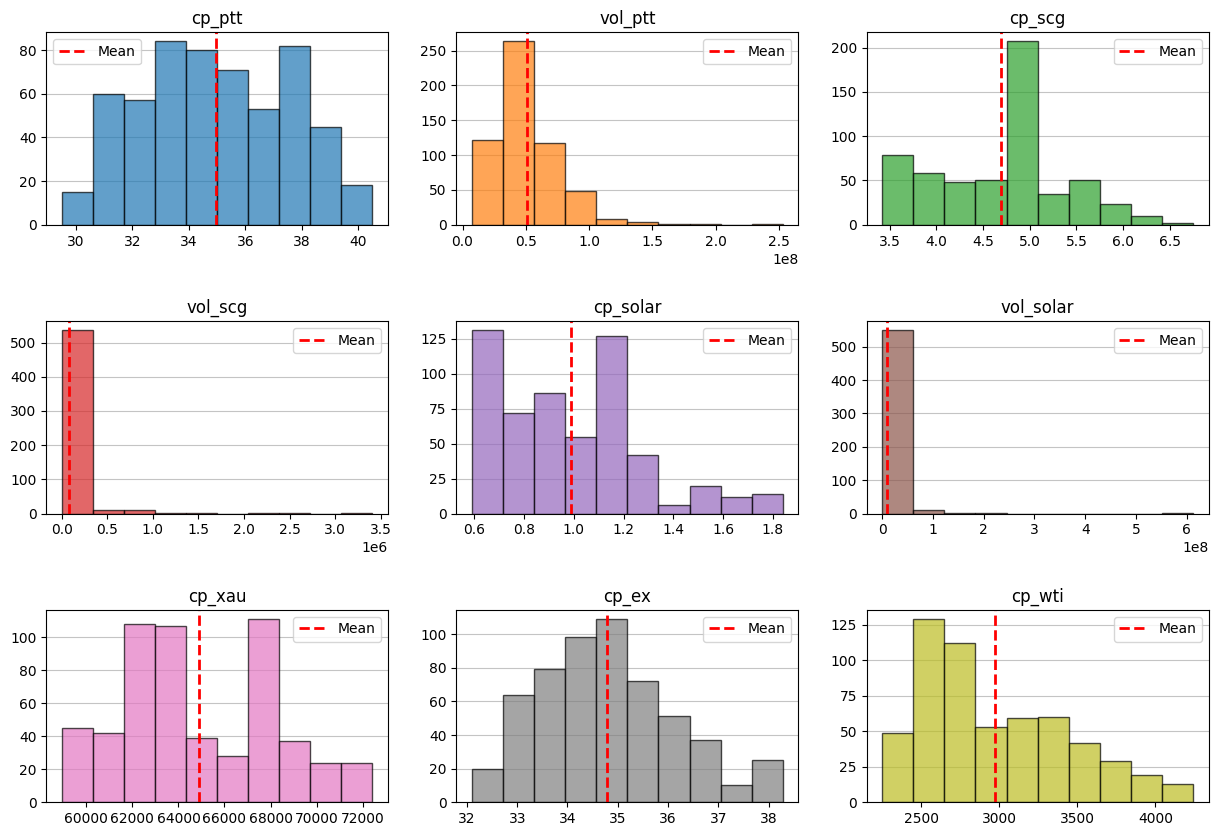

In [218]:
import pandas as pd
import matplotlib.pyplot as plt

# กำหนดสีและ alpha สำหรับแต่ละคอลัมน์
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# สร้าง histogram สำหรับทุกคอลัมน์ที่เป็นตัวเลข
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(all_data.columns[1:]):
    ax = axes[i // 3, i % 3]
    n, bins, patches = ax.hist(all_data[col], bins=10, color=color[i], alpha=0.7, edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.grid(axis='y', alpha=0.75)
    ax.set_axisbelow(True)

    # เพิ่มเส้นแนะนำ (แบบเส้นกำกับ) สำหรับค่าเฉลี่ย
    mean_value = all_data[col].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.legend()

plt.show()

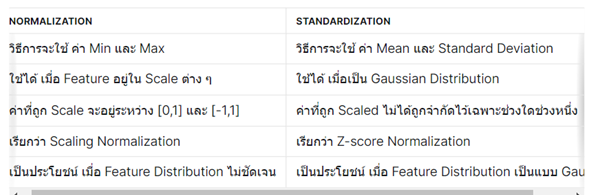

## Normalization

In [219]:
all_data_X = all_data[['cp_wti', 'cp_ex', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg','vol_scg', 'cp_solar', 'vol_solar']]
all_data_X

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2804.02,33.29,59690.63,38.00,54150000.0,6.75,2600000.0,1.81,3370000.0
1,2769.89,33.26,59444.93,38.00,38170000.0,6.00,2380000.0,1.76,5910000.0
2,2685.98,33.30,58925.02,37.75,26750000.0,5.55,798600.0,1.74,2750000.0
3,2668.87,33.34,59735.28,37.50,57080000.0,5.65,344500.0,1.84,2840000.0
4,2703.81,33.20,60315.44,37.25,34200000.0,5.70,376500.0,1.82,1590000.0
...,...,...,...,...,...,...,...,...,...
560,2548.64,34.60,71100.58,35.50,19200000.0,3.48,40500.0,0.69,442800.0
561,2595.40,34.55,71421.76,35.75,28880000.0,3.50,6400.0,0.68,1470000.0
562,2537.67,34.33,71303.41,35.75,51890000.0,3.48,7900.0,0.68,877400.0
563,2463.98,34.26,70782.53,35.75,55170000.0,3.48,4000.0,0.67,570200.0


In [220]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# สร้าง object MinMaxScaler
scaler = MinMaxScaler()

# Fit และ Transform ข้อมูล
normalized_data = scaler.fit_transform(all_data_X)

# สร้าง DataFrame ใหม่จากข้อมูลที่ปรับแล้ว
normalized_df = pd.DataFrame(normalized_data, columns=all_data_X.columns)

# สร้าง DataFrame ของคอลัมน์ 'date'
date = all_data[['date']]

# รวม DataFrame ของ 'date' และ DataFrame ของข้อมูลที่แทนค่าสูญหาย
cm_df = pd.concat([date, normalized_df], axis=1)
cm_df


,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,1-11-2021,0.277707,0.192557,0.056696,0.772727,0.190311,1.000000,0.762429,0.976,0.005396
1,2-11-2021,0.260553,0.187702,0.038501,0.772727,0.125204,0.774775,0.697903,0.936,0.009544
2,3-11-2021,0.218380,0.194175,0.000000,0.750000,0.078675,0.639640,0.234081,0.920,0.004383
3,4-11-2021,0.209781,0.200647,0.060003,0.727273,0.202249,0.669670,0.100895,1.000,0.004530
4,5-11-2021,0.227341,0.177994,0.102966,0.704545,0.109029,0.684685,0.110280,0.984,0.002489
...,...,...,...,...,...,...,...,...,...,...
560,25-12-2023,0.149353,0.404531,0.901646,0.545455,0.047914,0.018018,0.011732,0.080,0.000615
561,26-12-2023,0.172855,0.396440,0.925431,0.568182,0.087353,0.024024,0.001730,0.072,0.002293
562,27-12-2023,0.143839,0.360841,0.916667,0.568182,0.181103,0.018018,0.002170,0.072,0.001325
563,28-12-2023,0.106803,0.349515,0.878093,0.568182,0.194467,0.018018,0.001027,0.064,0.000823


In [221]:
#หาความสัมพันธ์
correlation_matrix = normalized_df.corr()
correlation_matrix

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
cp_wti,1.000000,0.284914,-0.132062,0.409808,0.171451,0.183925,-0.060499,0.243053,0.216083
cp_ex,0.284914,1.000000,0.225384,-0.286630,0.002774,-0.389053,-0.199150,-0.290972,-0.094672
cp_xau,-0.132062,0.225384,1.000000,-0.488330,-0.101879,-0.895157,-0.278292,-0.786415,-0.058242
cp_ptt,0.409808,-0.286630,-0.488330,1.000000,0.138281,0.560152,0.188278,0.680860,0.172644
vol_ptt,0.171451,0.002774,-0.101879,0.138281,1.000000,0.091851,0.020670,0.059343,-0.048401
cp_scg,0.183925,-0.389053,-0.895157,0.560152,0.091851,1.000000,0.380600,0.871139,0.115677
vol_scg,-0.060499,-0.199150,-0.278292,0.188278,0.020670,0.380600,1.000000,0.338661,0.014288
cp_solar,0.243053,-0.290972,-0.786415,0.680860,0.059343,0.871139,0.338661,1.000000,0.192042
vol_solar,0.216083,-0.094672,-0.058242,0.172644,-0.048401,0.115677,0.014288,0.192042,1.000000


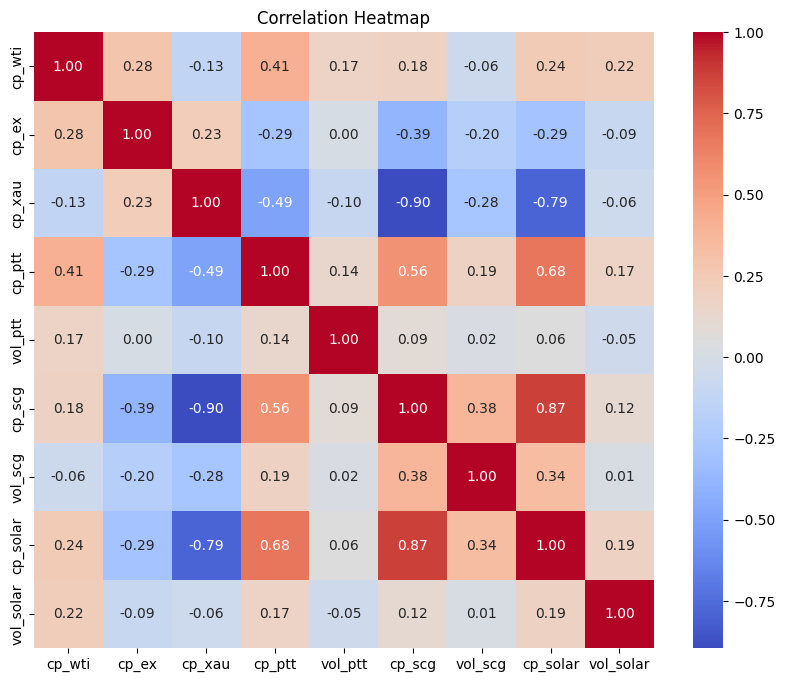

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

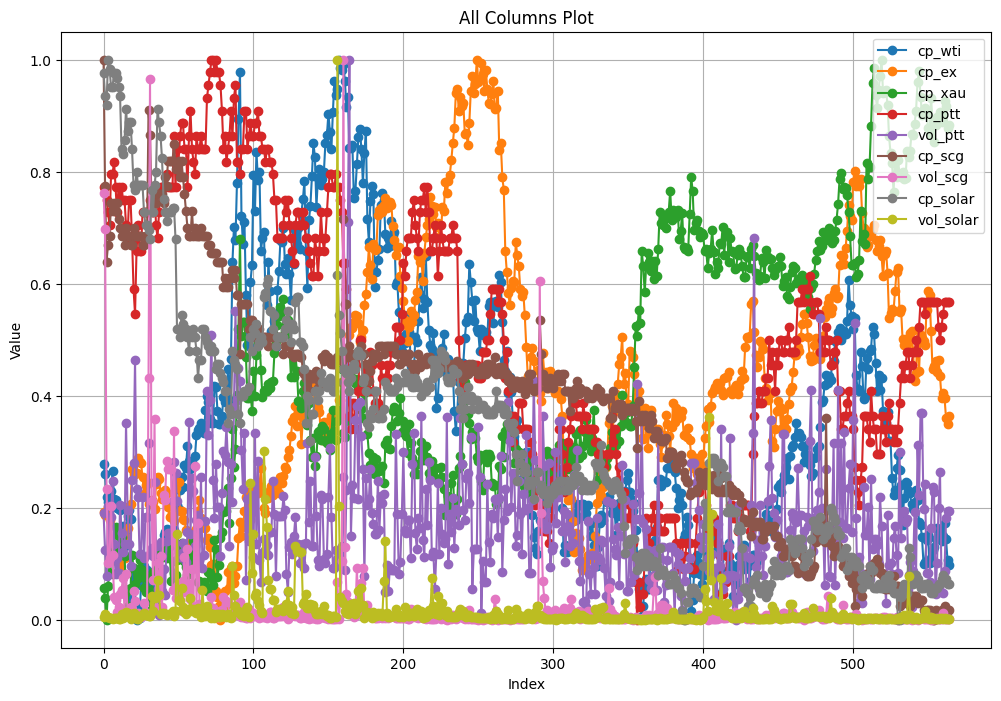

In [223]:
plt.figure(figsize=(12, 8))
for column in normalized_df.columns:
    plt.plot(normalized_df.index, normalized_df[column], marker='o', linestyle='-', label=column)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('All Columns Plot')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [224]:
#cm_df.to_csv('Project_data_Nm.csv', index=False)

#LSTM PTT

In [225]:
a = normalized_df[['cp_ptt','cp_wti','cp_ex','cp_xau','vol_ptt']]
a

,cp_ptt,cp_wti,cp_ex,cp_xau,vol_ptt
0,0.772727,0.277707,0.192557,0.056696,0.190311
1,0.772727,0.260553,0.187702,0.038501,0.125204
2,0.750000,0.218380,0.194175,0.000000,0.078675
3,0.727273,0.209781,0.200647,0.060003,0.202249
4,0.704545,0.227341,0.177994,0.102966,0.109029
...,...,...,...,...,...
560,0.545455,0.149353,0.404531,0.901646,0.047914
561,0.568182,0.172855,0.396440,0.925431,0.087353
562,0.568182,0.143839,0.360841,0.916667,0.181103
563,0.568182,0.106803,0.349515,0.878093,0.194467


In [226]:
# กำหนดตัวแปรอิสระ (independent variables) และตัวแปรตาม (dependent variable)
X = a[['cp_wti', 'cp_ex', 'cp_xau', 'vol_ptt']]
y = a['cp_ptt']

# ใช้ iloc เพื่อแบ่งชุดข้อมูล
X_train_ptt = X.iloc[:522, :]
X_test_ptt = X.iloc[522:, :]
y_train_ptt = y.iloc[:522]
y_test_ptt = y.iloc[522:]

##หาพารามิเตอร์

In [227]:
# from itertools import product
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.optimizers import Adam
# import numpy as np
# param_grid = {
#    'neurons_1': [100, 150],
#     'neurons_2': [50, 100],
#     'epochs': [50, 100, 200],
#     'batch_size': [32, 64, 128]
# }

# for params in product(param_grid['neurons_1'], param_grid['neurons_2'], param_grid['epochs'], param_grid['batch_size']):
#     neurons_1, neurons_2, epochs, batch_size = params

#     model = Sequential()
#     model.add(LSTM(neurons_1, activation='tanh', input_shape=(X_train_ptt.shape[1], 1)))
#     model.add(Dense(neurons_2, activation='tanh'))
#     model.add(Dense(1))
#     optimizer = Adam()
#     model.compile(optimizer=optimizer, loss='mse')

#     model.fit(X_train_ptt, y_train_ptt, epochs=epochs, batch_size=batch_size, verbose=0)

#     # ทดสอบโมเดล
#     y_pred = model.predict(X_train_ptt)

#     # คำนวณค่า MSE
#     mse = mean_squared_error(y_train_ptt, y_pred)
#     rmse = np.sqrt(mse)

#     print(f"neurons_1: {neurons_1}, neurons_2: {neurons_2}, epochs: {epochs}, batch_size: {batch_size}")
#     print(f"RMSE: {rmse}")

In [228]:
# from itertools import product
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.optimizers import Adam
# # กำหนดพารามิเตอร์ที่จะทดลอง

# param_grid = {
#     'neurons_1': [100, 150],
#     'neurons_2': [50, 100],
#     'epochs': [50, 100, 200],
#     'batch_size': [32, 64, 128]
# }

# best_model = None
# best_mse = float('inf')

# # ลูปผ่านพารามิเตอร์ที่จะทดลอง
# for params in product(param_grid['neurons_1'], param_grid['neurons_2'], param_grid['epochs'], param_grid['batch_size']):
#     neurons_1, neurons_2, epochs, batch_size = params

#     # สร้างและคอมไพล์โมเดล LSTM
#     model = Sequential()
#     model.add(LSTM(neurons_1, activation='tanh', input_shape=(X_train_ptt.shape[1], 1)))
#     model.add(Dense(neurons_2, activation='tanh'))
#     model.add(Dense(1))
#     optimizer = Adam()
#     model.compile(optimizer=optimizer, loss='mse')

#     # # แปลงข้อมูลให้เป็นรูปแบบที่เหมาะสมสำหรับ LSTM
#     # X_train_reshaped = X_train_ptt.values.reshape((X_train_ptt.shape[0], X_train_ptt.shape[1], 1))

#     # ทำการฝึกโมเดล
#     model.fit(X_train_ptt, y_train_ptt, epochs=epochs, batch_size=batch_size, verbose=0)

#     # # ทดสอบโมเดล
#     # X_test_reshaped = X_test_ptt.values.reshape((X_test_ptt.shape[0], X_test_ptt.shape[1], 1))
#     y_pred = model.predict(X_test_ptt)

#     # คำนวณค่า MSE
#     mse = mean_squared_error(y_test_ptt, y_pred)

#     # บันทึกโมเดลที่มี MSE ต่ำที่สุด
#     if mse < best_mse:
#         best_mse = mse
#         best_model = model
#         best_params = {'neurons_1': neurons_1, 'neurons_2': neurons_2, 'epochs': epochs, 'batch_size': batch_size}

# print("Best Parameters:", best_params)
# print("Best MSE:", best_mse)



##Fitt และ พยากรณ์ Train

In [229]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np

# Define the neural network model
model = Sequential()
model.add(LSTM(150, activation='tanh', input_shape=(X_train_ptt.shape[1], 1)))
model.add(Dense(100, activation='tanh'))
model.add(Dense(1))

# Compile the model with an optimizer and a loss function

model.compile(optimizer=Adam(), loss='mse')

# Train the model on the training data
model.fit(X_train_ptt, y_train_ptt, epochs=200, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred_ptt_trian = model.predict(X_train_ptt)


17/17 [==============================] - 1s 4ms/step


##เปรียบเทียบค่าจริงและค่าพยากรณ์

In [230]:
import pandas as pd
import numpy as np

# Create a DataFrame for comparison
lstm_ptt_pd_train = pd.DataFrame({'Actual': y_train_ptt, 'Predicted': y_pred_ptt_trian.flatten()})

# Print the comparison table
lstm_ptt_pd_train


,Actual,Predicted
0,0.772727,0.810869
1,0.772727,0.861098
2,0.750000,0.924677
3,0.727273,0.764396
4,0.704545,0.722901
...,...,...
517,0.295455,0.320471
518,0.295455,0.322768
519,0.363636,0.317934
520,0.340909,0.366895


##แปลงค่ากลับ

In [231]:
max_original = all_data_X['cp_ptt'].max()  # Max Value ของข้อมูลเดิม
min_original = all_data_X['cp_ptt'].min()  # Min Value ของข้อมูลเดิม

lstm_ptt_pd_train['Actual'] = (lstm_ptt_pd_train['Actual'] * (max_original - min_original)) +min_original
lstm_ptt_pd_train['Predicted'] = (lstm_ptt_pd_train['Predicted'] * (max_original - min_original)) + min_original

# Print the DataFrame with original values
lstm_ptt_pd_train

,Actual,Predicted
0,38.00,38.419556
1,38.00,38.972080
2,37.75,39.671444
3,37.50,37.908356
4,37.25,37.451916
...,...,...
517,32.75,33.025185
518,32.75,33.050446
519,33.50,32.997276
520,33.25,33.535851


##ความคลาดเคลื่อน

In [232]:
mse = mean_squared_error(lstm_ptt_pd_train['Actual'], lstm_ptt_pd_train['Predicted'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.4}")

n = len(lstm_ptt_pd_train['Actual'])
mape = (1/n) * np.sum(np.abs((lstm_ptt_pd_train['Actual'] - lstm_ptt_pd_train['Predicted']) /lstm_ptt_pd_train['Actual'])) *100
print(f"Mean Absolute Percentage Error (MAPE) :{mape:.4}%")

Root Mean Squared Error (RMSE) : 1.106
Mean Absolute Percentage Error (MAPE) :2.545%


##กราฟ Train

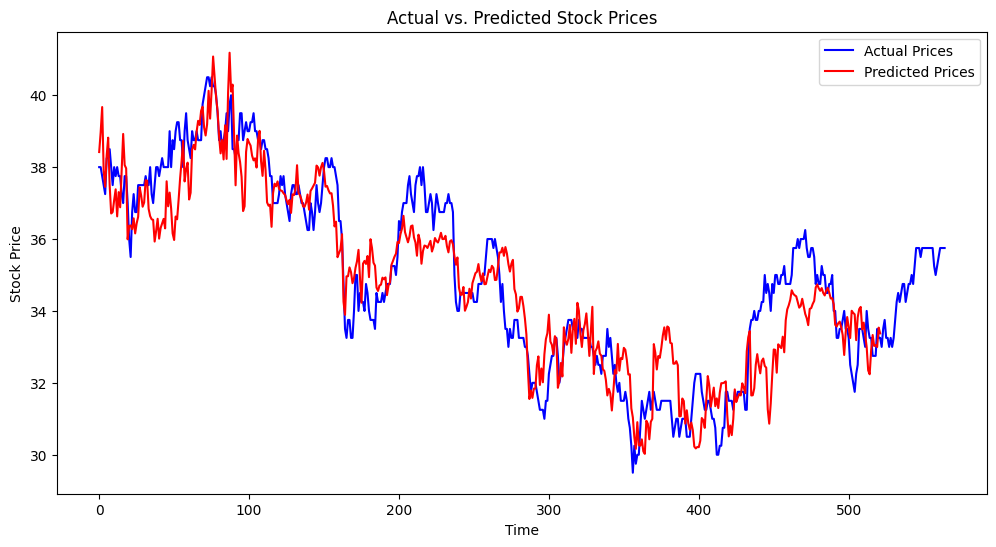

In [233]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(all_data_X['cp_ptt'].values, label='Actual Prices', color='blue')
plt.plot(lstm_ptt_pd_train['Predicted'], label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

##Fitt และ พยากรณ์ Test

In [234]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np

# Define the neural network model
model = Sequential()
model.add(LSTM(150, activation='tanh', input_shape=(X_train_ptt.shape[1], 1)))
model.add(Dense(100, activation='tanh'))
model.add(Dense(1))

# Compile the model with an optimizer and a loss function

model.compile(optimizer=Adam(), loss='mse')

# Train the model on the training data
model.fit(X_train_ptt, y_train_ptt, epochs=200, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred_ptt_test = model.predict(X_test_ptt)


2/2 [==============================] - 0s 7ms/step


##เปรียบเทียบค่าจริงและค่าพยากรณ์

In [235]:
import pandas as pd
import numpy as np

# Create a DataFrame for comparison
lstm_ptt_pd_test = pd.DataFrame({'Actual': y_test_ptt, 'Predicted': y_pred_ptt_test.flatten()})

# Print the comparison table
lstm_ptt_pd_test


,Actual,Predicted
522,0.318182,0.345008
523,0.363636,0.386121
524,0.386364,0.417092
525,0.340909,0.420097
526,0.340909,0.396485
527,0.318182,0.388332
528,0.340909,0.406333
529,0.318182,0.408610
530,0.340909,0.401340
531,0.386364,0.444075


##แปลงค่ากลับ

In [236]:
max_original = all_data_X['cp_ptt'].max()  # Max Value ของข้อมูลเดิม
min_original = all_data_X['cp_ptt'].min()  # Min Value ของข้อมูลเดิม

lstm_ptt_pd_test['Actual'] = (lstm_ptt_pd_test['Actual'] * (max_original - min_original)) +min_original
lstm_ptt_pd_test['Predicted'] = (lstm_ptt_pd_test['Predicted'] * (max_original - min_original)) + min_original

# Print the DataFrame with original values
lstm_ptt_pd_test

,Actual,Predicted
522,33.00,33.295082
523,33.50,33.747330
524,33.75,34.088013
525,33.25,34.121071
526,33.25,33.861332
527,33.00,33.771648
528,33.25,33.969669
529,33.00,33.994705
530,33.25,33.914742
531,33.75,34.384823


##ความคลาดเคลื่อน

In [237]:
mse = mean_squared_error(lstm_ptt_pd_test['Actual'], lstm_ptt_pd_test['Predicted'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.4}")

n = len(lstm_ptt_pd_test['Actual'])
mape = (1/n) * np.sum(np.abs((lstm_ptt_pd_test['Actual'] - lstm_ptt_pd_test['Predicted']) /lstm_ptt_pd_test['Actual'])) *100
print(f"Mean Absolute Percentage Error (MAPE) :{mape:.4}%")

Root Mean Squared Error (RMSE) : 1.838
Mean Absolute Percentage Error (MAPE) :4.486%


##กราฟ Test

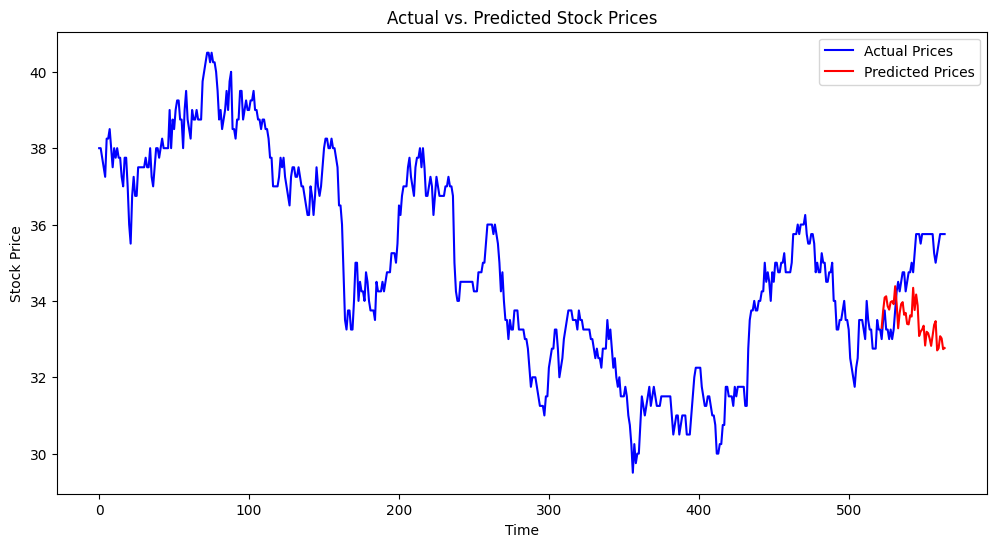

In [238]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(all_data_X['cp_ptt'].values, label='Actual Prices', color='blue')
plt.plot(lstm_ptt_pd_test['Predicted'], label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

In [239]:
# lstm_ptt_pd_train.to_csv('lstm_ptt_train.csv', index=False)

In [240]:
# lstm_ptt_pd_test.to_csv('lstm_ptt_test.csv', index=False)

#LSTM SCG

In [241]:
b = normalized_df[['cp_scg','cp_wti','cp_ex','cp_xau','vol_scg']]
b

,cp_scg,cp_wti,cp_ex,cp_xau,vol_scg
0,1.000000,0.277707,0.192557,0.056696,0.762429
1,0.774775,0.260553,0.187702,0.038501,0.697903
2,0.639640,0.218380,0.194175,0.000000,0.234081
3,0.669670,0.209781,0.200647,0.060003,0.100895
4,0.684685,0.227341,0.177994,0.102966,0.110280
...,...,...,...,...,...
560,0.018018,0.149353,0.404531,0.901646,0.011732
561,0.024024,0.172855,0.396440,0.925431,0.001730
562,0.018018,0.143839,0.360841,0.916667,0.002170
563,0.018018,0.106803,0.349515,0.878093,0.001027


In [242]:
# กำหนดตัวแปรอิสระ (independent variables) และตัวแปรตาม (dependent variable)
X = b[['cp_wti', 'cp_ex', 'cp_xau', 'vol_scg']]
y = b['cp_scg']

# ใช้ iloc เพื่อแบ่งชุดข้อมูล
X_train_scg = X.iloc[:522, :]
X_test_scg = X.iloc[522:, :]
y_train_scg = y.iloc[:522]
y_test_scg = y.iloc[522:]

##หาพารามิเตอร์

In [243]:
# from itertools import product
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.optimizers import Adam
# import numpy as np

# param_grid = {
#     'neurons_1': [100, 150],
#     'neurons_2': [50, 100],
#     'epochs': [50, 100, 200],
#     'batch_size': [32, 64, 128]
# }

# for params in product(param_grid['neurons_1'], param_grid['neurons_2'], param_grid['epochs'], param_grid['batch_size']):
#     neurons_1, neurons_2, epochs, batch_size = params

#     model = Sequential()
#     model.add(LSTM(neurons_1, activation='tanh', input_shape=(X_train_scg.shape[1], 1)))
#     model.add(Dense(neurons_2, activation='tanh'))
#     model.add(Dense(1))
#     optimizer = Adam()
#     model.compile(optimizer=optimizer, loss='mse')

#     model.fit(X_train_scg, y_train_scg, epochs=epochs, batch_size=batch_size, verbose=0)

#     y_pred = model.predict(X_train_scg)

#     # คำนวณค่า MSE
#     mse = mean_squared_error(y_train_scg, y_pred)
#     rmse = np.sqrt(mse)
#     # print(f"neurons_1: {neurons_1}, neurons_2: {neurons_2}, epochs: {epochs}, batch_size: {batch_size}")
#     print(f"RMSE: {rmse}")

In [244]:
# from itertools import product
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.optimizers import Adam
# # กำหนดพารามิเตอร์ที่จะทดลอง
# param_grid = {
#     'neurons_1': [100, 150],
#     'neurons_2': [50, 100],
#     'epochs': [50, 100, 200],
#     'batch_size': [32, 64, 128]
# }

# best_model = None
# best_mse = float('inf')

# # ลูปผ่านพารามิเตอร์ที่จะทดลอง
# for params in product(param_grid['neurons_1'], param_grid['neurons_2'], param_grid['epochs'], param_grid['batch_size']):
#     neurons_1, neurons_2, epochs, batch_size = params

#     # สร้างและคอมไพล์โมเดล LSTM
#     model = Sequential()
#     model.add(LSTM(neurons_1, activation='tanh', input_shape=(X_train_scg.shape[1], 1)))
#     model.add(Dense(neurons_2, activation='tanh'))
#     model.add(Dense(1))
#     optimizer = Adam()
#     model.compile(optimizer=optimizer, loss='mse')

#     # ทำการฝึกโมเดล
#     model.fit(X_train_scg, y_train_scg, epochs=epochs, batch_size=batch_size, verbose=0)

#     # ทดสอบโมเดล
#     y_pred = model.predict(X_test_scg)

#     # คำนวณค่า MSE
#     mse = mean_squared_error(y_test_scg, y_pred)

#     # บันทึกโมเดลที่มี MSE ต่ำที่สุด
#     if mse < best_mse:
#         best_mse = mse
#         best_model = model
#         best_params = {'neurons_1': neurons_1, 'neurons_2': neurons_2, 'epochs': epochs, 'batch_size': batch_size}

# print("Best Parameters:", best_params)
# print("Best MSE:", best_mse)



##Fitt และ พยากรณ์ Train

In [245]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np

# Define the neural network model
model = Sequential()
model.add(LSTM(150, activation='tanh', input_shape=(X_train_scg.shape[1], 1)))
model.add(Dense(100, activation='tanh'))
model.add(Dense(1))

# Compile the model with an optimizer and a loss function

model.compile(optimizer=Adam(), loss='mse')

# Train the model on the training data
model.fit(X_train_scg, y_train_scg, epochs=200, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred_scg_train = model.predict(X_train_scg)


17/17 [==============================] - 1s 4ms/step


##เปรียบเทียบค่าจริงและค่าพยากรณ์

In [246]:
import pandas as pd
import numpy as np

# Create a DataFrame for comparison
lstm_scg_pd_train = pd.DataFrame({'Actual': y_train_scg, 'Predicted': y_pred_scg_train.flatten()})

# Print the comparison table
lstm_scg_pd_train


,Actual,Predicted
0,1.000000,0.907116
1,0.774775,0.923208
2,0.639640,0.888973
3,0.669670,0.762004
4,0.684685,0.704479
...,...,...
517,0.096096,0.025545
518,0.084084,0.011207
519,0.084084,0.028854
520,0.078078,0.045676


##แปลงค่ากลับ

In [247]:
max_original = all_data_X['cp_scg'].max()  # Max Value ของข้อมูลเดิม
min_original = all_data_X['cp_scg'].min()  # Min Value ของข้อมูลเดิม

lstm_scg_pd_train['Actual'] = (lstm_scg_pd_train['Actual'] * (max_original - min_original)) +min_original
lstm_scg_pd_train['Predicted'] = (lstm_scg_pd_train['Predicted'] * (max_original - min_original)) + min_original

# Print the DataFrame with original values
lstm_scg_pd_train

,Actual,Predicted
0,6.75,6.440696
1,6.00,6.494282
2,5.55,6.380279
3,5.65,5.957474
4,5.70,5.765915
...,...,...
517,3.74,3.505065
518,3.70,3.457319
519,3.70,3.516085
520,3.68,3.572101


##ความคลาดเคลื่อน

In [248]:
mse = mean_squared_error(lstm_scg_pd_train['Actual'], lstm_scg_pd_train['Predicted'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.4}")

n = len(lstm_scg_pd_train['Actual'])
mape = (1/n) * np.sum(np.abs((lstm_scg_pd_train['Actual'] - lstm_scg_pd_train['Predicted']) /lstm_scg_pd_train['Actual'])) *100
print(f"Mean Absolute Percentage Error (MAPE) :{mape:.4}%")

Root Mean Squared Error (RMSE) : 0.1954
Mean Absolute Percentage Error (MAPE) :3.279%


##กราฟ Train

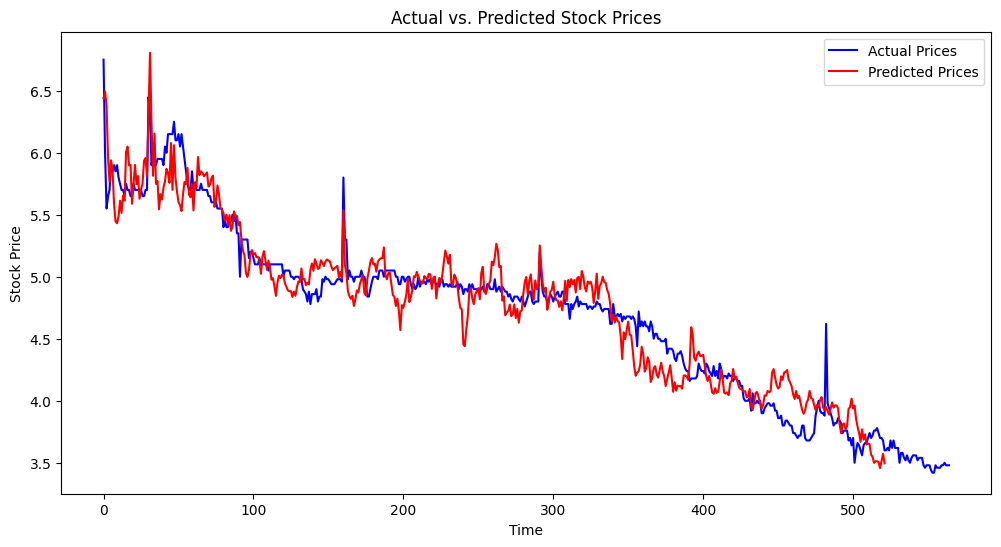

In [249]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(all_data_X['cp_scg'].values, label='Actual Prices', color='blue')
plt.plot(lstm_scg_pd_train['Predicted'], label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

##Fitt และ พยากรณ์ Test

In [250]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np

# Define the neural network model
model = Sequential()
model.add(LSTM(150, activation='tanh', input_shape=(X_train_scg.shape[1], 1)))
model.add(Dense(100, activation='tanh'))
model.add(Dense(1))

# Compile the model with an optimizer and a loss function

model.compile(optimizer=Adam(), loss='mse')

# Train the model on the training data
model.fit(X_train_scg, y_train_scg, epochs=200, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred_scg_test = model.predict(X_test_scg)


2/2 [==============================] - 0s 8ms/step


##เปรียบเทียบค่าจริงและค่าพยากรณ์

In [251]:
import pandas as pd
import numpy as np

# Create a DataFrame for comparison
lstm_scg_pd_test = pd.DataFrame({'Actual': y_test_scg, 'Predicted': y_pred_scg_test.flatten()})

# Print the comparison table
lstm_scg_pd_test



,Actual,Predicted
522,0.054054,0.074780
523,0.060060,0.090831
524,0.054054,0.132449
525,0.078078,0.127793
526,0.060060,0.130060
527,0.078078,0.138736
528,0.060060,0.123647
529,0.060060,0.104877
530,0.060060,0.095327
531,0.024024,0.129990


##แปลงค่ากลับ

In [252]:
max_original = all_data_X['cp_scg'].max()  # Max Value ของข้อมูลเดิม
min_original = all_data_X['cp_scg'].min()  # Min Value ของข้อมูลเดิม

lstm_scg_pd_test['Actual'] = (lstm_scg_pd_test['Actual'] * (max_original - min_original)) +min_original
lstm_scg_pd_test['Predicted'] = (lstm_scg_pd_test['Predicted'] * (max_original - min_original)) + min_original

# Print the DataFrame with original values
lstm_scg_pd_test

,Actual,Predicted
522,3.60,3.669017
523,3.62,3.722466
524,3.60,3.861055
525,3.68,3.845551
526,3.62,3.853101
527,3.68,3.881990
528,3.62,3.831743
529,3.62,3.769239
530,3.62,3.737438
531,3.50,3.852866


##ความคลาดเคลื่อน

In [253]:
mse = mean_squared_error(lstm_scg_pd_test['Actual'], lstm_scg_pd_test['Predicted'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.4}")

n = len(lstm_scg_pd_test['Actual'])
mape = (1/n) * np.sum(np.abs((lstm_scg_pd_test['Actual'] - lstm_scg_pd_test['Predicted']) /lstm_scg_pd_test['Actual'])) *100
print(f"Mean Absolute Percentage Error (MAPE) :{mape:.4}%")

Root Mean Squared Error (RMSE) : 0.5701
Mean Absolute Percentage Error (MAPE) :14.81%


##กราฟ Test

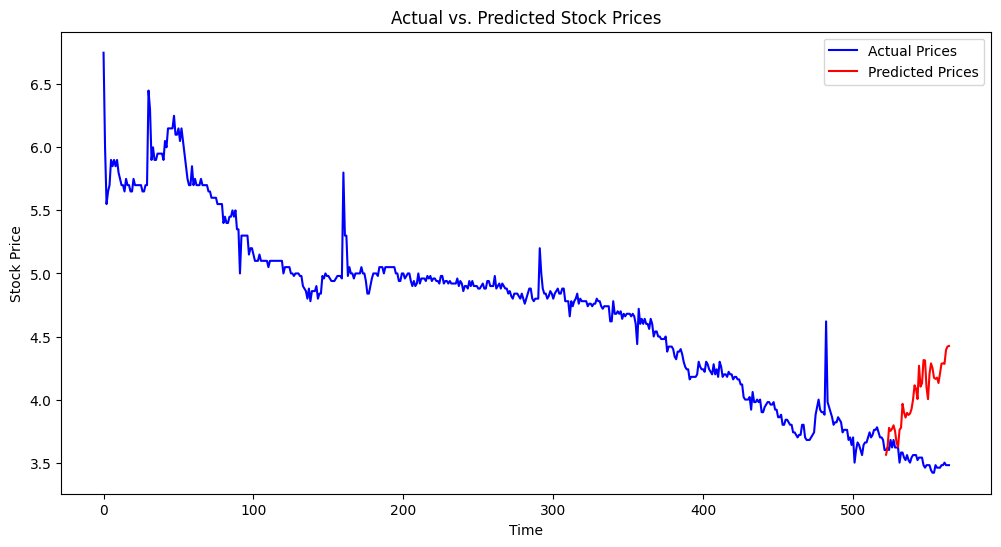

In [172]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(all_data_X['cp_scg'].values, label='Actual Prices', color='blue')
plt.plot(lstm_scg_pd_test['Predicted'], label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

In [ ]:
# lstm_scg_pd_test.to_csv('lstm_scg_test.csv', index=False)

In [ ]:
# lstm_scg_pd_train.to_csv('lstm_scg_train.csv', index=False)

#LSTM SOLAR

In [ ]:
c = normalized_df[['cp_solar','cp_wti','cp_ex','cp_xau','vol_solar']]
c

,cp_solar,cp_wti,cp_ex,cp_xau,vol_solar
0,0.976,0.277707,0.192557,0.056696,0.005396
1,0.936,0.260553,0.187702,0.038501,0.009544
2,0.920,0.218380,0.194175,0.000000,0.004383
3,1.000,0.209781,0.200647,0.060003,0.004530
4,0.984,0.227341,0.177994,0.102966,0.002489
...,...,...,...,...,...
560,0.080,0.149353,0.404531,0.901646,0.000615
561,0.072,0.172855,0.396440,0.925431,0.002293
562,0.072,0.143839,0.360841,0.916667,0.001325
563,0.064,0.106803,0.349515,0.878093,0.000823


In [ ]:
# กำหนดตัวแปรอิสระ (independent variables) และตัวแปรตาม (dependent variable)
X = c[['cp_wti', 'cp_ex', 'cp_xau', 'vol_solar']]
y = c['cp_solar']

# ใช้ iloc เพื่อแบ่งชุดข้อมูล
X_train_solar = X.iloc[:522, :]
X_test_solar = X.iloc[522:, :]
y_train_solar = y.iloc[:522]
y_test_solar = y.iloc[522:]

##หาพารามิเตอร์

In [ ]:
from itertools import product
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
# กำหนดพารามิเตอร์ที่จะทดลอง
param_grid = {
    'neurons_1': [100, 150],
    'neurons_2': [50, 100],
    'epochs': [50, 100, 200],
    'batch_size': [32, 64, 128]
}

best_model = None
best_mse = float('inf')

# ลูปผ่านพารามิเตอร์ที่จะทดลอง
for params in product(param_grid['neurons_1'], param_grid['neurons_2'], param_grid['epochs'], param_grid['batch_size']):
    neurons_1, neurons_2, epochs, batch_size = params

    # สร้างและคอมไพล์โมเดล LSTM
    model = Sequential()
    model.add(LSTM(neurons_1, activation='tanh', input_shape=(X_train_solar.shape[1], 1)))
    model.add(Dense(neurons_2, activation='tanh'))
    model.add(Dense(1))
    optimizer = Adam()
    model.compile(optimizer=optimizer, loss='mse')

    # ทำการฝึกโมเดล
    model.fit(X_train_solar, y_train_solar, epochs=epochs, batch_size=batch_size, verbose=0)

    # ทดสอบโมเดล

    y_pred = model.predict(X_test_solar)

    # คำนวณค่า MSE
    mse = mean_squared_error(y_test_solar, y_pred)

    # บันทึกโมเดลที่มี MSE ต่ำที่สุด
    if mse < best_mse:
        best_mse = mse
        best_model = model
        best_params = {'neurons_1': neurons_1, 'neurons_2': neurons_2, 'epochs': epochs, 'batch_size': batch_size}

print("Best Parameters:", best_params)
print("Best MSE:", best_mse)



2/2 [==============================] - 1s 9ms/step
Best Parameters: {'neurons_1': 150, 'neurons_2': 50, 'epochs': 100, 'batch_size': 32}
Best MSE: 0.0006219198645204535


##Fitt และ พยากรณ์ Train

In [ ]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np

# Define the neural network model
model = Sequential()
model.add(LSTM(150, activation='tanh', input_shape=(X_train_solar.shape[1], 1)))
model.add(Dense(100, activation='tanh'))
model.add(Dense(1))

# Compile the model with an optimizer and a loss function

model.compile(optimizer=Adam(), loss='mse')

# Train the model on the training data
model.fit(X_train_solar, y_train_solar, epochs=100, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred_solar_train = model.predict(X_train_solar)


17/17 [==============================] - 1s 9ms/step


##เปรียบเทียบค่าจริงและค่าพยากรณ์

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame for comparison
lstm_solar_pd_train = pd.DataFrame({'Actual': y_train_solar, 'Predicted': y_pred_solar_train.flatten()})

# Print the comparison table
lstm_solar_pd_train


,Actual,Predicted
0,0.976,0.650713
1,0.936,0.701680
2,0.920,0.819611
3,1.000,0.699386
4,0.984,0.628849
...,...,...
517,0.064,0.072696
518,0.056,0.057135
519,0.056,0.058064
520,0.056,0.075857


##แปลงค่ากลับ

In [ ]:
max_original = all_data_X['cp_solar'].max()  # Max Value ของข้อมูลเดิม
min_original = all_data_X['cp_solar'].min()  # Min Value ของข้อมูลเดิม

lstm_solar_pd_train['Actual'] = (lstm_solar_pd_train['Actual'] * (max_original - min_original)) +min_original
lstm_solar_pd_train['Predicted'] = (lstm_solar_pd_train['Predicted'] * (max_original - min_original)) + min_original

# Print the DataFrame with original values
lstm_solar_pd_train

,Actual,Predicted
0,1.81,1.403391
1,1.76,1.467100
2,1.74,1.614514
3,1.84,1.464232
4,1.82,1.376062
...,...,...
517,0.67,0.680870
518,0.66,0.661418
519,0.66,0.662580
520,0.66,0.684821


##ความคลาดเคลื่อน

In [ ]:
mse = mean_squared_error(lstm_solar_pd_train['Actual'], lstm_solar_pd_train['Predicted'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.4}")

n = len(lstm_solar_pd_train['Actual'])
mape = (1/n) * np.sum(np.abs((lstm_solar_pd_train['Actual'] - lstm_solar_pd_train['Predicted']) /lstm_solar_pd_train['Actual'])) *100
print(f"Mean Absolute Percentage Error (MAPE) :{mape:.4}%")

Root Mean Squared Error (RMSE) : 0.1255
Mean Absolute Percentage Error (MAPE) :9.474%


##กราฟ Train

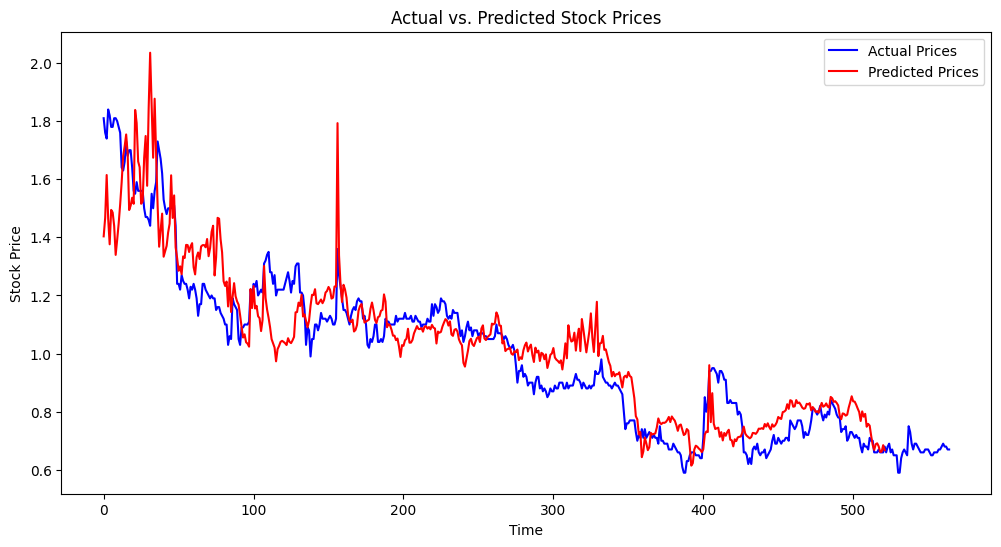

In [ ]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(all_data_X['cp_solar'].values, label='Actual Prices', color='blue')
plt.plot(lstm_solar_pd_train['Predicted'], label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

##Fitt และ พยากรณ์ Test

In [ ]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np

# Define the neural network model
model = Sequential()
model.add(LSTM(150, activation='tanh', input_shape=(X_train_solar.shape[1], 1)))
model.add(Dense(50, activation='tanh'))
model.add(Dense(1))

# Compile the model with an optimizer and a loss function

model.compile(optimizer=Adam(), loss='mse')

# Train the model on the training data
model.fit(X_train_solar, y_train_solar, epochs=100, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred_solar_test = model.predict(X_test_solar)


2/2 [==============================] - 0s 9ms/step


##เปรียบเทียบค่าจริงและค่าพยากรณ์

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame for comparison
lstm_solar_pd_test = pd.DataFrame({'Actual': y_test_solar, 'Predicted': y_pred_solar_test.flatten()})

# Print the comparison table
lstm_solar_pd_test


,Actual,Predicted
522,0.056,0.028746
523,0.072,0.051382
524,0.080,0.077862
525,0.056,0.085128
526,0.064,0.072392
527,0.048,0.080182
528,0.048,0.060956
529,0.048,0.072719
530,0.000,0.067566
531,0.000,0.081756


##แปลงค่ากลับ

In [ ]:
max_original = all_data_X['cp_solar'].max()  # Max Value ของข้อมูลเดิม
min_original = all_data_X['cp_solar'].min()  # Min Value ของข้อมูลเดิม

lstm_solar_pd_test['Actual'] = (lstm_solar_pd_test['Actual'] * (max_original - min_original)) +min_original
lstm_solar_pd_test['Predicted'] = (lstm_solar_pd_test['Predicted'] * (max_original - min_original)) + min_original

# Print the DataFrame with original values
lstm_solar_pd_test

,Actual,Predicted
522,0.66,0.625932
523,0.68,0.654228
524,0.69,0.687328
525,0.66,0.696410
526,0.67,0.680490
527,0.65,0.690227
528,0.65,0.666196
529,0.65,0.680899
530,0.59,0.674457
531,0.59,0.692195


##ความคลาดเคลื่อน

In [ ]:
mse = mean_squared_error(lstm_solar_pd_test['Actual'], lstm_solar_pd_test['Predicted'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.4}")

n = len(lstm_solar_pd_test['Actual'])
mape = (1/n) * np.sum(np.abs((lstm_solar_pd_test['Actual'] - lstm_solar_pd_test['Predicted']) /lstm_solar_pd_test['Actual'])) *100
print(f"Mean Absolute Percentage Error (MAPE) :{mape:.4}%")

Root Mean Squared Error (RMSE) : 0.03472
Mean Absolute Percentage Error (MAPE) :4.423%


##กราฟ Test

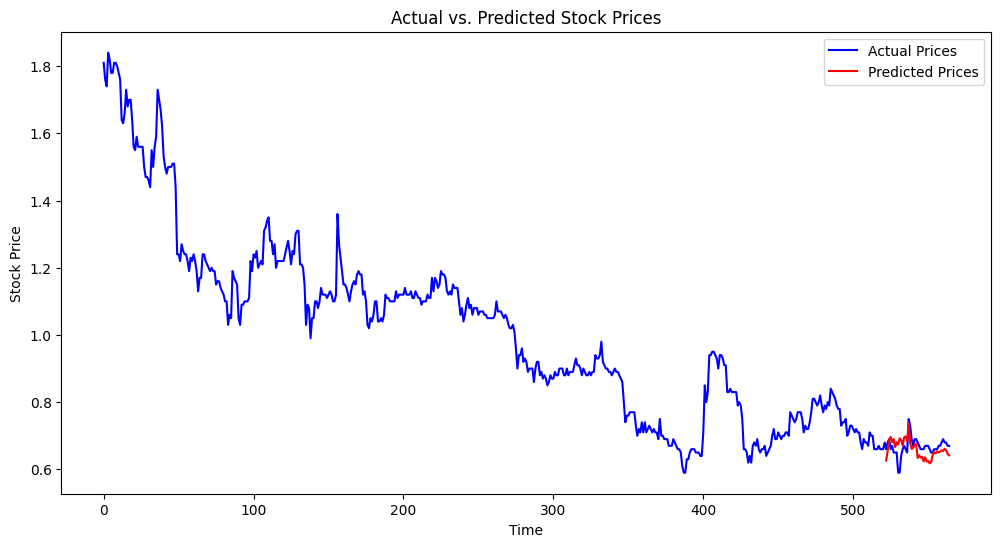

In [ ]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(all_data_X['cp_solar'].values, label='Actual Prices', color='blue')
plt.plot(lstm_solar_pd_test['Predicted'], label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

In [ ]:
# lstm_solar_pd_train.to_csv('lstm_solar_train.csv', index=False)

In [ ]:
# lstm_solar_pd_test.to_csv('lstm_solar_test.csv', index=False)